In [ ]:
"""
Notebook for computing decompositions of face images using pre-computed PSD factors
"""

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle

#### Helper functions

In [2]:
def _converttowhitebase(img,thresh):
    maxval = np.max(img)
    ht,wd = img.shape
    for i in range(ht):
        for j in range(wd):
            if img[i,j] < thresh:
                img[i,j] = maxval
                
    return img


# Generate random rank-one matrix
def standardrankone(q,r):
    v = np.zeros(q)
    v[r,] = 1.0
    V = np.outer(v,v)
    return V


embeddim = 22
HEIGHT = 19
WIDTH = 19


def buildmuralarray(ListOfImages,MuralDimensions):
    nRows,nCols = MuralDimensions
    muralarray = -100*np.ones((embeddim*nRows,embeddim*nCols))
    c = 0
    
    for i in range(nRows):
        for j in range(nCols):
            if c < len(ListOfImages):
                Img_square = ListOfImages[c]
                Img_square = np.ones(Img_square.shape) - Img_square
                muralarray[i*embeddim:i*embeddim+HEIGHT,j*embeddim:j*embeddim+WIDTH] = Img_square
            else:
                pass
            c+=1
            
    muralarray = _converttowhitebase(muralarray,-50)
    return muralarray

In [4]:
# Load data set
imgmat = np.load('facedata.npy')

# Data parameters
HEIGHT = 19
WIDTH = 19

In [5]:
# Which face do you want to display?
ListOfFaceIndices = [13]

# Other parameters
nRows = len(ListOfFaceIndices)
embeddim = 22

#### 7x7 matrices

In [6]:
# Load Dataset
#fname = 'learned_factors/face_rank7_150.pickle'
fname = 'learned_factors/totaldampedinvscale_face_rank7_500.pickle'
with open(fname, 'rb') as f:
    X = pickle.load(f)
r = 7

# If these files exist you can go ahead and load these files
AA_flat = np.reshape(X['A'],(HEIGHT*WIDTH,r*r))

0.18796809307926077
0.11602983670020099
0.09790284759374884
0.07260637796758633
0.0079965616182221
2.562378004448134e-06
6.134650447758343e-06


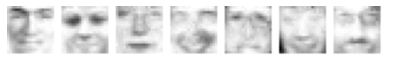

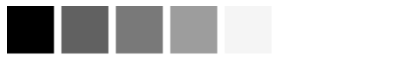

In [8]:
# Decomposition
nCols = r
for i,ii in enumerate(ListOfFaceIndices):
    
    B = X['B'][ii,:,:]
    d,v = np.linalg.eig(B)
    muralarray = []
    weightarray = []
    for j in range(nCols):
        print(d[j])
        weightarray.append(np.ones((HEIGHT,WIDTH)) * d[j])
        
        V = np.outer(v[:,j],v[:,j])
        V = np.reshape(V,(r*r,1))
        Img_Flat = AA_flat @ V
        Img_square = np.reshape(Img_Flat,(HEIGHT,WIDTH))
        muralarray.append(Img_square)
        
muralarray = buildmuralarray(muralarray,(1,7))
plt.figure(figsize=(nCols,nRows))
plt.imshow(muralarray,cmap='gray')
plt.axis('off')
plt.savefig('images/PSD_decom.png',bbox_inches = 'tight',pad_inches = 0)

weightarray = buildmuralarray(weightarray,(1,7))
plt.figure(figsize=(nCols,nRows))
plt.imshow(weightarray,cmap='gray')
plt.axis('off')
plt.savefig('images/PSD_weight.png',bbox_inches = 'tight',pad_inches = 0)

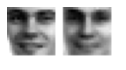

In [9]:
# Actual images
nCols = 2
muralarray = -100*np.ones((embeddim*nRows,embeddim*nCols))
j = 0
for i,ii in enumerate(ListOfFaceIndices):
    for j in [0,1]:
        if j == 0:
            Img_Flat = imgmat[:,ii]
        if j == 1:
            B = np.reshape(X['B'][ii,:,:],[r*r,1])
            Img_Flat = AA_flat @ B
            Img_Flat = np.ones(Img_Flat.shape) - Img_Flat
        Img_square = np.reshape(Img_Flat,(HEIGHT,WIDTH))
        muralarray[i*embeddim:i*embeddim+HEIGHT,j*embeddim:j*embeddim+WIDTH] = Img_square
        
muralarray = _converttowhitebase(muralarray,-50)
plt.figure(figsize=(2*nRows,2*nCols))
plt.imshow(muralarray,cmap='gray')
plt.axis('off')
plt.savefig('images/PSD_recon.png',bbox_inches = 'tight',pad_inches = 0)

#### 9 blocks of 2x2

In [10]:
# Load Dataset
fname = 'learned_factors/block222222222_500.pickle'
with open(fname, 'rb') as f:
    X = pickle.load(f)
    
AA_flat = np.reshape(X['A'],(HEIGHT*WIDTH,18*18))
r = 9

0.0007088276977679532
0.03569206147608812
3.5369265771051372e-06
0.01268520748129984
0.07391603836187123
0.025223631890480346
0.00013382547702105868
0.015949828936609775
0.014950347020766981


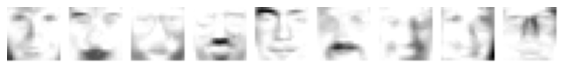

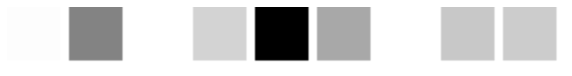

In [11]:
# Decomposition
nCols = r
for i,ii in enumerate(ListOfFaceIndices):
    
    B = X['B'][ii,:,:]
    d,v = np.linalg.eig(B)
    muralarray = []
    weightarray = []
    for j in range(nCols):
        print(d[j])
        weightarray.append(np.ones((HEIGHT,WIDTH)) * d[j])
        
        V = np.outer(v[:,j],v[:,j])
        V = np.reshape(V,(4*r*r,1))
        Img_Flat = AA_flat @ V
        Img_square = np.reshape(Img_Flat,(HEIGHT,WIDTH))
        muralarray.append(Img_square)
        
muralarray = buildmuralarray(muralarray,(1,9))
plt.figure(figsize=(10,90))
plt.imshow(muralarray,cmap='gray')
plt.axis('off')
plt.savefig('images/2x2_decom.png',bbox_inches = 'tight',pad_inches = 0)

weightarray = buildmuralarray(weightarray,(1,9))
plt.figure(figsize=(10,90))
plt.imshow(weightarray,cmap='gray')
plt.axis('off')
plt.savefig('images/2x2_weight.png',bbox_inches = 'tight',pad_inches = 0)

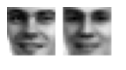

In [12]:
# Actual images
ListOfImages = []
for i,ii in enumerate(ListOfFaceIndices):
    Img_square = np.reshape(imgmat[:,ii],(HEIGHT,WIDTH))
    Img_square = np.ones(Img_square.shape) - Img_square
    ListOfImages.append(Img_square)
    
    B = np.reshape(X['B'][ii,:,:],[4*r*r,1])
    Img_Flat = AA_flat @ B
    Img_square = np.reshape(Img_Flat,(HEIGHT,WIDTH))
    ListOfImages.append(Img_square)
    
muralarray = buildmuralarray(ListOfImages,(1,2))
plt.figure(figsize=(2*1,2*2))
plt.imshow(muralarray,cmap='gray')
plt.axis('off')
plt.savefig('images/2x2_recon.png',bbox_inches = 'tight',pad_inches = 0)

In [13]:
# Rows showing spectrum of an atom

ImgList = []
for i in range(r):
    for k in range(20):
        arg = k*np.pi/20
        V = np.zeros((2*r,2*r))
        V[2*i,2*i] = np.cos(arg)**2
        V[2*i+1,2*i+1] = np.sin(arg)**2
        V[2*i,2*i+1] = np.cos(arg)*np.sin(arg)
        V[2*i+1,2*i] = np.cos(arg)*np.sin(arg)
        V_flat = np.reshape(V,(4*r*r,1))
        Img_flat = AA_flat @ V_flat
        Img_square = np.reshape(Img_flat,(HEIGHT,WIDTH))
        ImgList.append(Img_square)

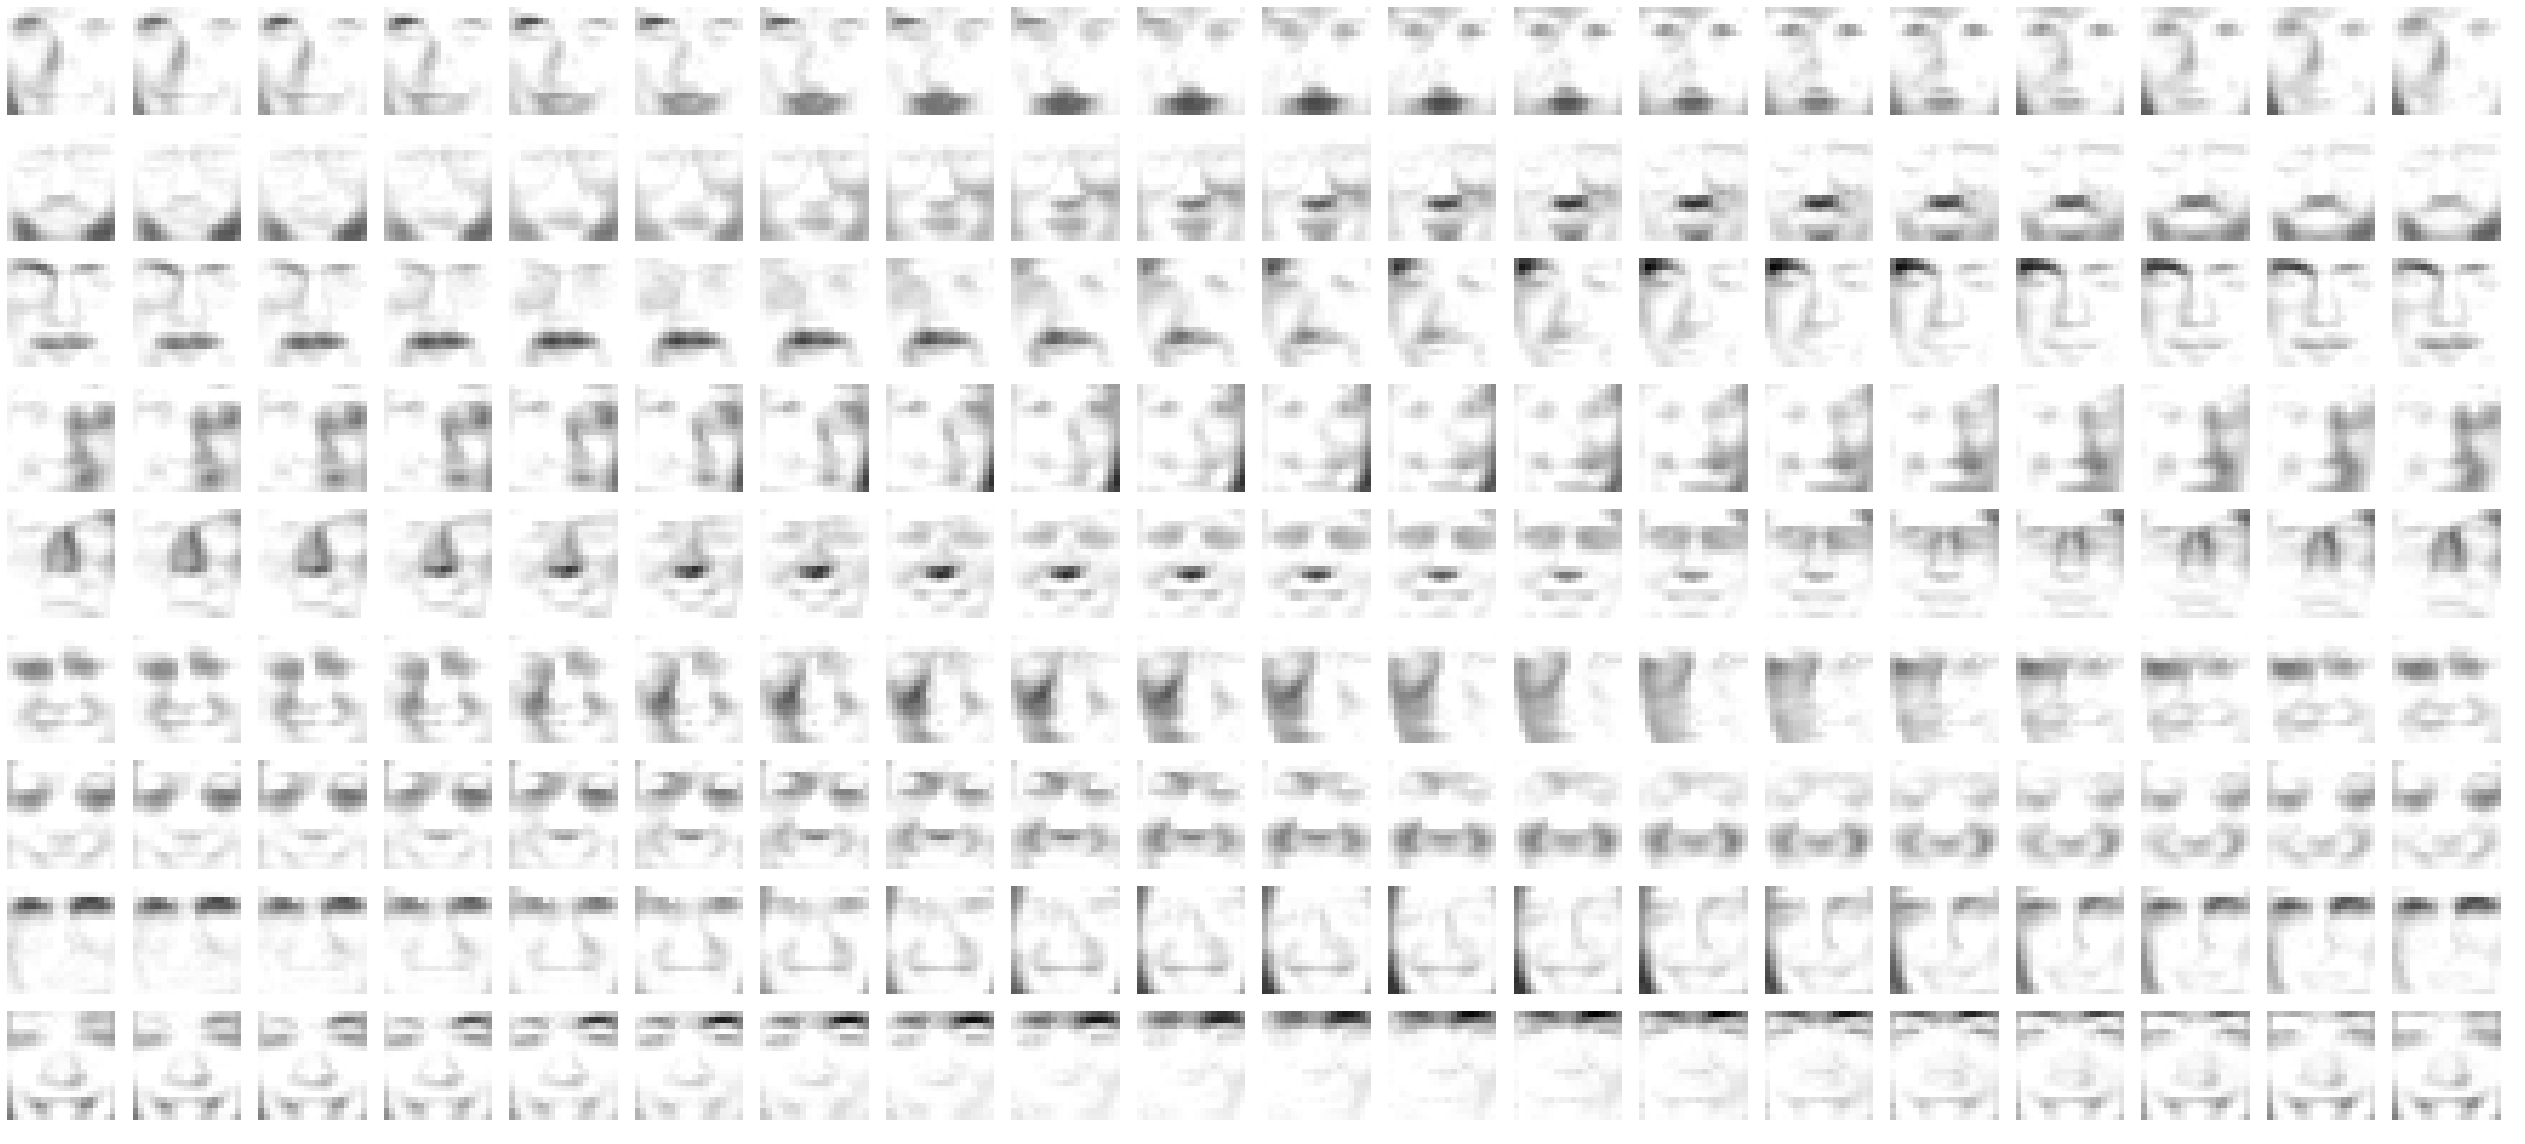

In [14]:
muralarray = buildmuralarray(ImgList,(9,20))
plt.figure(figsize=(45,100))
plt.imshow(muralarray,cmap='gray')
plt.axis('off')
plt.savefig('images/2x2_atoms.png',bbox_inches = 'tight',pad_inches = 0)

#### NMF

In [15]:
# Load Dataset
fname = 'learned_factors/block1x27_500.pickle'
with open(fname, 'rb') as f:
    X = pickle.load(f)
AA_flat = np.reshape(X['A'],(HEIGHT*WIDTH,27*27))

0.005640293657299987
0.006322235221603408
0.0054719535912026935
0.0006499193242478378
7.269115808204901e-06
0.0003055047765328256
0.009925920364344948
0.03368376926395446
0.012293231499116437
0.008832805422573638
0.028878979734991716
0.022796486558939028
0.036109133501241605
0.021668727448958362
0.0017970397656034394
3.408281949780001e-05
0.008540855425085852
0.030194929697810513
0.044793742789845464
0.05000152529631157
0.003483110683358742
0.04665156931936725
0.0064724321576359965
0.010737234043955497
0.03387771574781071
0.02326978860689341
0.017027592552587775


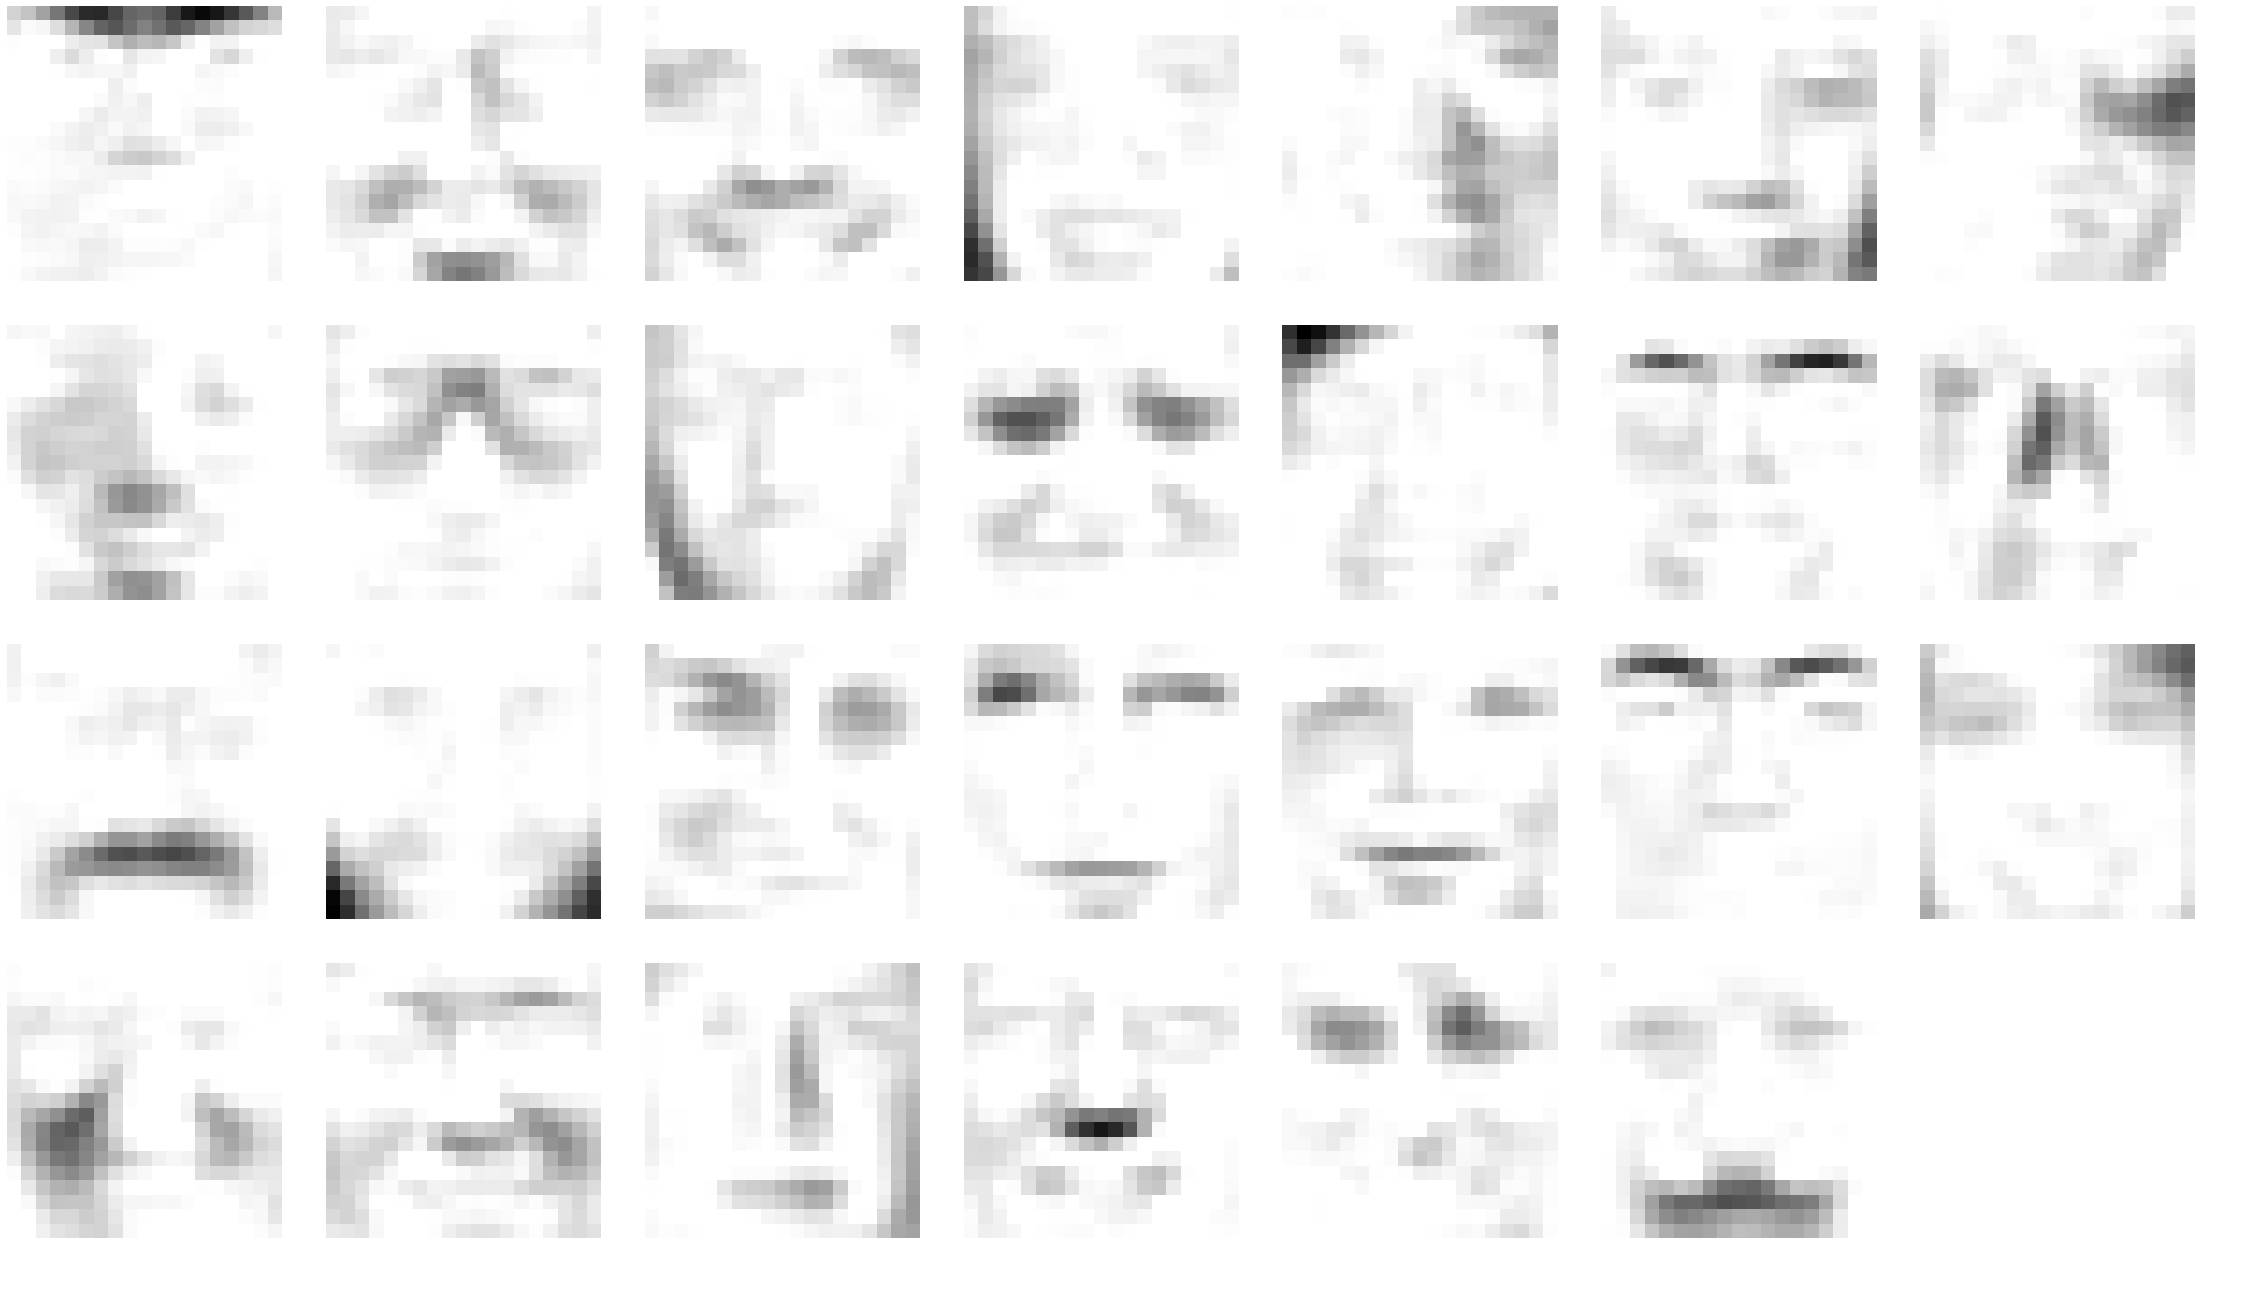

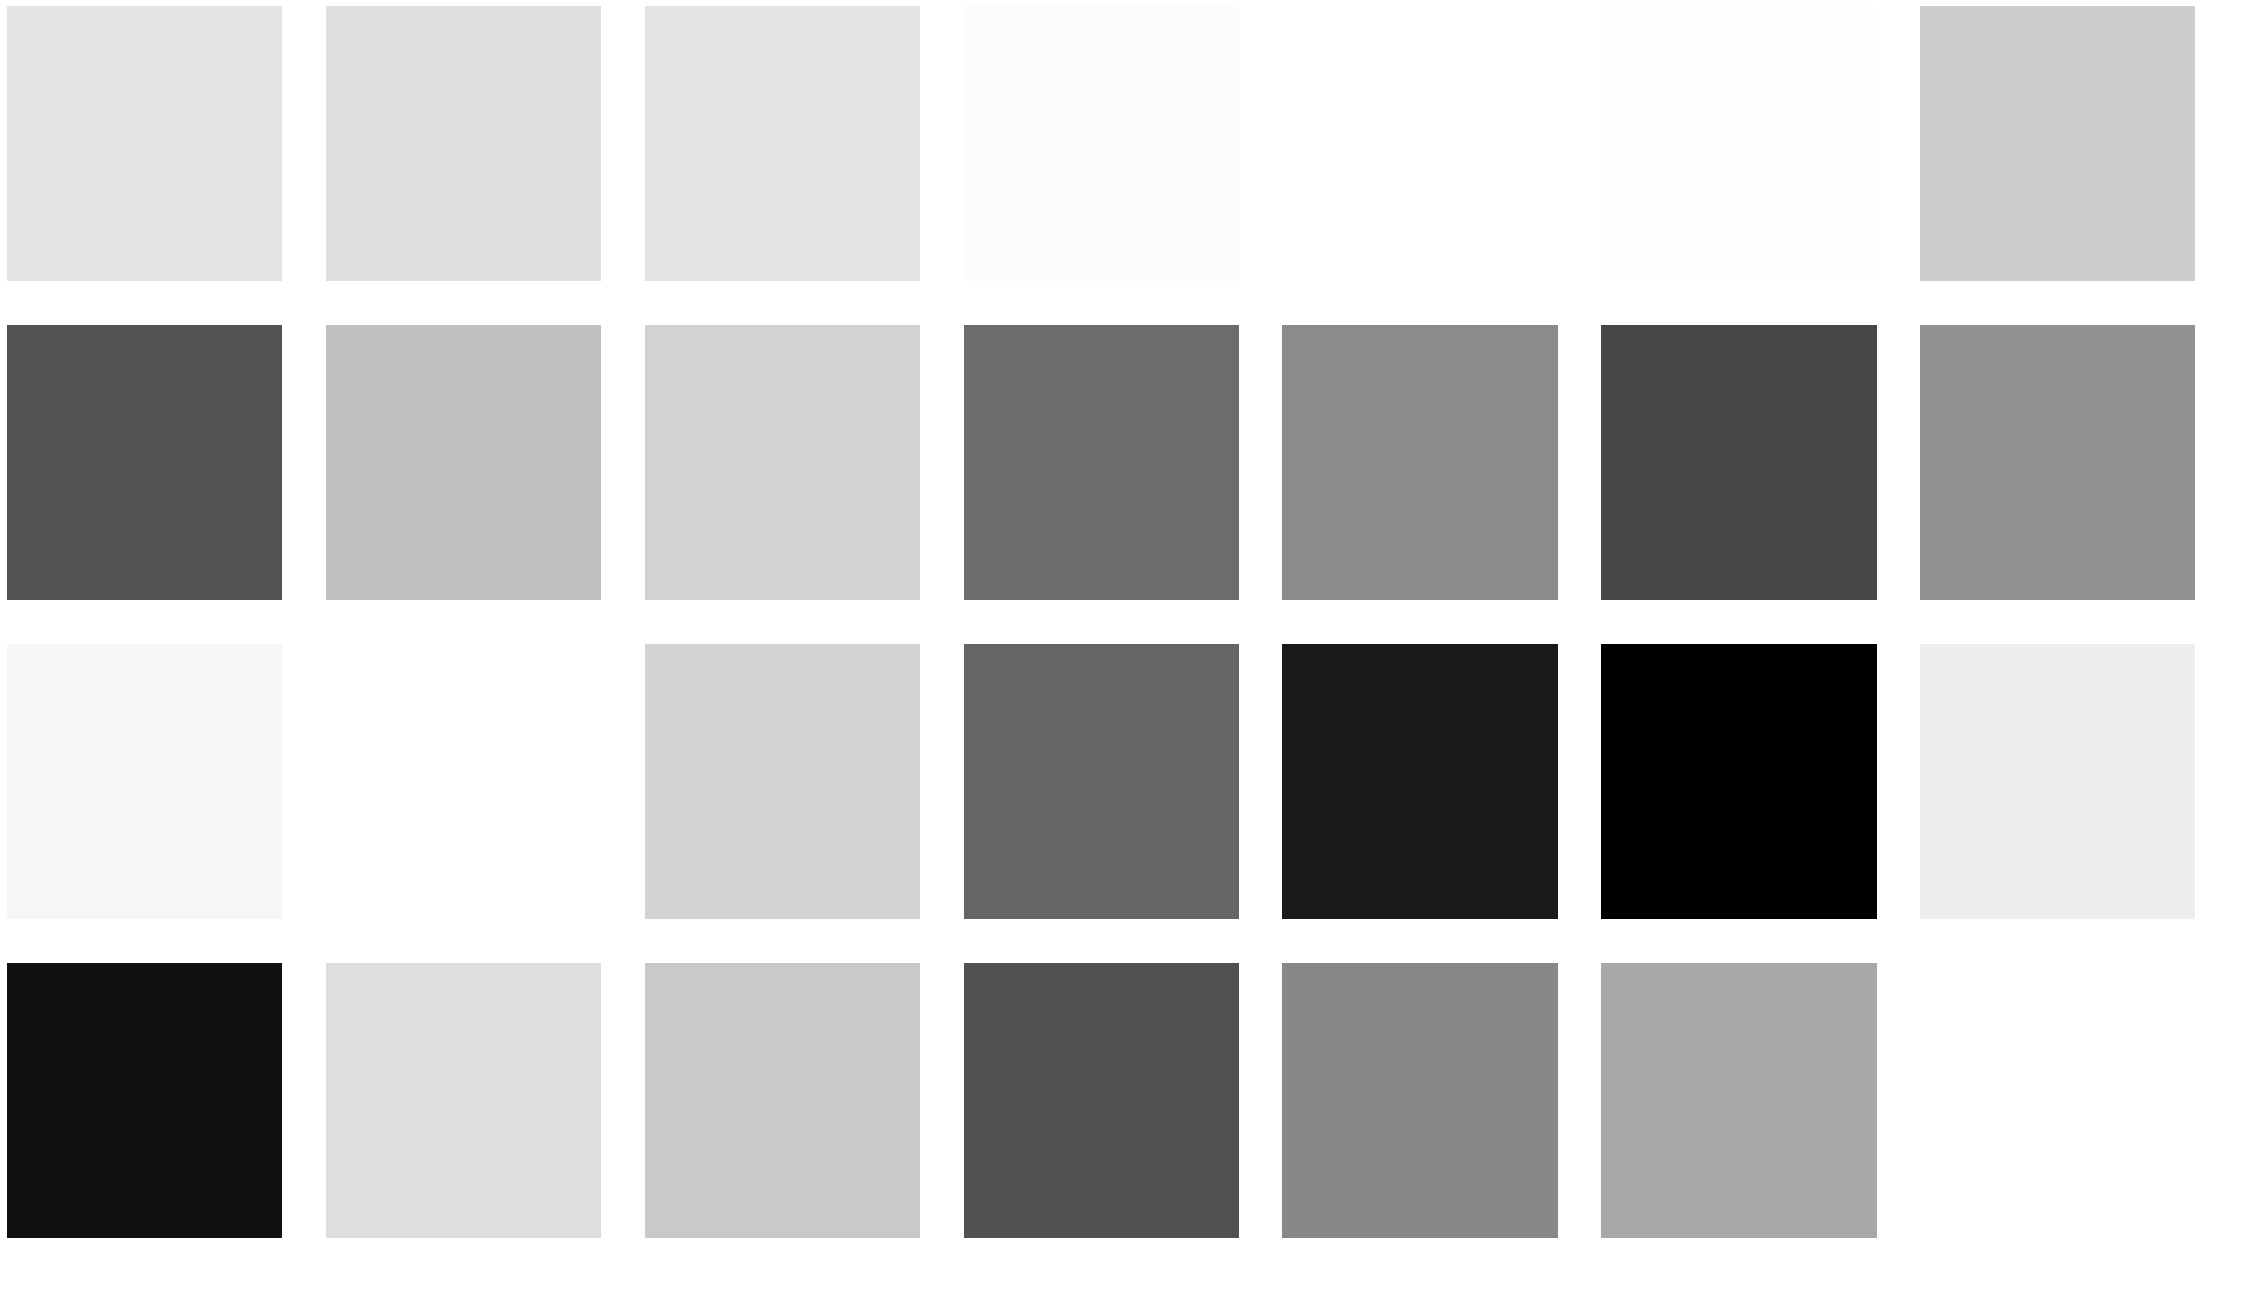

In [16]:
r = 27
nCols = 27

muralarray = []
for i,ii in enumerate(ListOfFaceIndices):
    
    B = X['B'][ii,:,:]
    d,v = np.linalg.eig(B)
    muralarray = []
    weightarray = []
    for j in range(nCols):
        print(d[j])
        weightarray.append(np.ones((HEIGHT,WIDTH)) * d[j])
        
        V = np.outer(v[:,j],v[:,j])
        V = np.reshape(V,(r*r,1))
        Img_Flat = AA_flat @ V
        Img_square = np.reshape(Img_Flat,(HEIGHT,WIDTH))
        muralarray.append(Img_square)
        
muralarray = buildmuralarray(muralarray,(4,7))
plt.figure(figsize=(40,70))
plt.imshow(muralarray,cmap='gray')
plt.axis('off')
plt.savefig('images/1x1_decom.png',bbox_inches = 'tight',pad_inches = 0)

weightarray = buildmuralarray(weightarray,(4,7))
plt.figure(figsize=(40,70))
plt.imshow(weightarray,cmap='gray')
plt.axis('off')
plt.savefig('images/1x1_weight.png',bbox_inches = 'tight',pad_inches = 0)

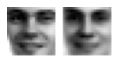

In [17]:
# Actual images
ListOfImages = []
for i,ii in enumerate(ListOfFaceIndices):
    Img_square = np.reshape(imgmat[:,ii],(HEIGHT,WIDTH))
    Img_square = np.ones(Img_square.shape) - Img_square
    ListOfImages.append(Img_square)
    
    B = np.reshape(X['B'][ii,:,:],[r*r,1])
    Img_Flat = AA_flat @ B
    Img_square = np.reshape(Img_Flat,(HEIGHT,WIDTH))
    ListOfImages.append(Img_square)
    
muralarray = buildmuralarray(ListOfImages,(1,2))
plt.figure(figsize=(2*1,2*2))
plt.imshow(muralarray,cmap='gray')
plt.axis('off')
plt.savefig('images/1x1_recon.png',bbox_inches = 'tight',pad_inches = 0)